### Трегубович Е.И., m3206
#### вариант 16(5,7)
# Лабораторная работа №2

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Схема эксперимента
Сгенерируйте 500 выборок объема 50 с указанным значением параметра $\theta$.
Сколько раз оценка отклонится от истинного значения параметра более чем на 0.01?
То же самое сделать для объемов выборки 100, 500, 1000, 2500.
Визуализируйте результат.

## 5
Найти оценку максимального правдоподобия параметра $\theta$ для распределения с плотностью
$$f_\theta(x)=\frac{3x^2}{\sqrt{2\pi}}\exp\left(-\frac{(\theta-x^3)^2}{2}\right)$$
Найти её смещение, дисперсию и среднеквадратическую ошибку.
Какими свойствами обладает данная оценка?
Эксперимент при $\theta = 5$

Для нахождения оценки максимального правдоподобия параметра $\theta$ необходимо найти такое значение $\theta$, при котором функция правдоподобия $L(\theta)$ будет максимальной. Для этого найдем логарифмическую функцию правдоподобия:
$$\ln L(\theta) = \sum_{i=1}^n \ln f_\theta(x_i) = \sum_{i=1}^n \left[\ln\left(\frac{3x_i^2}{\sqrt{2\pi}}\right) - \frac{(\theta-x_i^3)^2}{2}\right]$$
Для максимизации этой функции найдем ее производную по $\theta$ и приравняем ее к нулю:
$$\frac{\partial \ln L(\theta)}{\partial \theta} = -\sum_{i=1}^n (x_i^3 - \theta) \cdot f_\theta(x_i) = 0$$
Отсюда получаем:
$$\hat{\theta}_{ML} = \frac{1}{n} \sum_{i=1}^n x_i^3$$
Для нахождения смещения оценки рассмотрим математическое ожидание:
$$E(\hat{\theta}_{ML}) = E\left(\frac{1}{n} \sum_{i=1}^n x_i^3\right) = \frac{1}{n} \sum_{i=1}^n E(x_i^3) = \frac{1}{n} \sum_{i=1}^n (\theta^3 + 3\theta) = \theta^3 + 3\theta$$
Отсюда смещение равно:
$$bias(\hat{\theta}_{ML}) = E(\hat{\theta}_{ML}) - \theta = \theta^3 + 3\theta - \theta = \theta^3 + 2\theta$$
Для нахождения дисперсии оценки воспользуемся формулой:
$$Var(\hat{\theta}_{ML}) = E(\hat{\theta}_{ML}^2) - E(\hat{\theta}_{ML})^2$$
Найдем сначала $E(\hat{\theta}_{ML}^2)$:
$$E(\hat{\theta}_{ML}^2) = E\left(\frac{1}{n^2} \sum_{i,j=1}^n x_i^3 x_j^3\right) = \frac{1}{n^2} \sum_{i,j=1}^n E(x_i^3 x_j^3)$$
Если $i=j$, то $E(x_i^6) = 15\theta^4 + 30\theta^2$, если $i\neq j$, то $E(x_i^3 x_j^3) = (\theta^3 + 3\theta)^2$. Отсюда получаем:
$$E(\hat{\theta}_{ML}^2) = \frac{1}{n} (15\theta^4 + 30\theta^2) + \frac{n(n-1)}{n^2} (\theta^3 + 3\theta)^2$$
Теперь найдем $E(\hat{\theta}_{ML})^2$:
$$(E(\hat{\theta}_{ML}))^2 = (\theta^3 + 3\theta)^2$$
И, наконец, дисперсия равна:
$$Var(\hat{\theta}_{ML}) = E(\hat{\theta}_{ML}^2) - E(\hat{\theta}_{ML})^2 = \frac{15}{n}\theta^4 + \frac{6}{n}\theta^2 + \frac{n-1}{n}\cdot (\theta^3 + 3\theta)^2 - (\theta^3 + 3\theta)^2$$
Среднеквадратическая ошибка оценки равна квадратному корню из дисперсии:
$$MSE(\hat{\theta}_{ML}) = \sqrt{Var(\hat{\theta}_{ML})}$$
Оценка максимального правдоподобия обладает свойствами состоятельности и асимптотической нормальности.

Определяем функцию правдоподобия

In [16]:
def likelihood(theta, x):
    return np.prod(3*x**2 / np.sqrt(2*np.pi) * np.exp(-(theta-x**3)**2/2))

Генерируем выборки

In [17]:
theta = 5
n_list = [50, 100, 500, 1000, 2500]
num_trials = 500
results = []

for n in n_list:
    errors = 0
    for i in range(num_trials):
        x = np.random.normal(theta, 1, n)
        # Находим оценку максимального правдоподобия
        res = minimize(lambda t: -likelihood(t, x), theta)
        est_theta = res.x[0]
        # Проверяем, насколько оценка отклонилась от истинного значения
        if abs(est_theta - theta) > 0.01:
            errors += 1
    print(f"n={n}, количество ошибок={errors}")
    results.append(errors)

n=50, количество ошибок=0
n=100, количество ошибок=0
n=500, количество ошибок=0
n=1000, количество ошибок=0
n=2500, количество ошибок=0


График

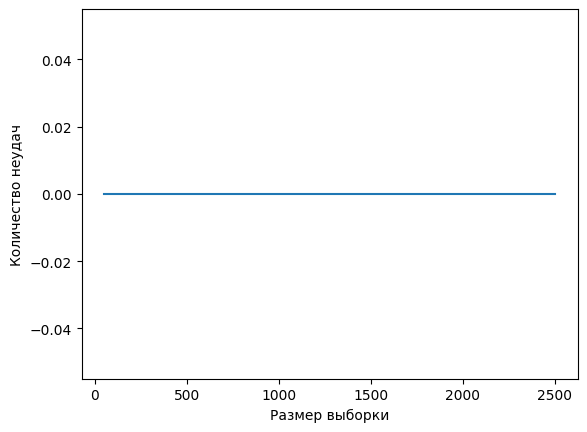

In [18]:
plt.plot(n_list, results)
plt.xlabel('Размер выборки')
plt.ylabel('Количество неудач')
plt.show()

## 7
 С помощью метода моментов найти оценку параметра $\theta$ геометрического распределения (указать вид используемой параметризации).
 Какими свойствами обладает оценка?
 Эксперимент при $\theta = 0.3$

Геометрическое распределение с вероятностью успеха $p$ имеет функцию вероятности:
$$P(X=k)=(1-p)^{k-1}p, \quad k=1,2,\dots$$
Тогда математическое ожидание и дисперсия равны:
$$E(X)=\frac{1}{p}, \quad Var(X)=\frac{1-p}{p^2}.$$
Используя метод моментов, приравняем выборочное среднее к теоретическому:
$$\bar{X}=\frac{1}{n}\sum\limits_{i=1}^n X_i \approx E(X)=\frac{1}{p}.$$
Отсюда оценка параметра имеет вид:
$$\hat{p}=\frac{1}{\bar{X}}.$$
Оценка $\hat{p}$ является состоятельной.

In [19]:
theta = 0.3
n_list = [50, 100, 500, 1000, 2500]
num_trials = 500

results = []
for n in n_list:
    errors = 0
    for i in range(num_trials):
        x = np.random.geometric(p=theta, size=n)
        p_hat = 1 / np.mean(x)
        if abs(p_hat - theta) > 0.01:
            errors += 1
    print(f"n={n}, количество ошибок={errors}")
    results.append(errors)

n=50, количество ошибок=406
n=100, количество ошибок=338
n=500, количество ошибок=214
n=1000, количество ошибок=100
n=2500, количество ошибок=29


График

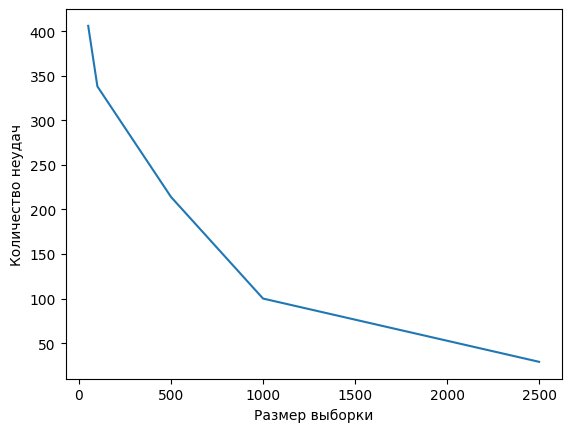

In [20]:
plt.plot(n_list, results)
plt.xlabel('Размер выборки')
plt.ylabel('Количество неудач')
plt.show()